https://musicinformationretrieval.com/ipython_audio.html

In [180]:
from IPython.display import Audio
import librosa
from scipy.io.wavfile import write
from scipy import signal
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd


plt.rcParams["figure.figsize"] = (14,5)
plt.rcParams.update({'font.size': 14})
     

In [176]:
!wget "https://ia803109.us.archive.org/12/items/cd_ray-charles-volume-2-seven-classic-albums_ray-charles-betty-carter-milt-jackson/disc4/04.21.%20Ray%20Charles%20-%20Hit%20the%20Road%2C%20Jack_sample.mp3"

#Courtesy of archive.org

--2024-01-05 19:24:55--  https://ia803109.us.archive.org/12/items/cd_ray-charles-volume-2-seven-classic-albums_ray-charles-betty-carter-milt-jackson/disc4/04.21.%20Ray%20Charles%20-%20Hit%20the%20Road%2C%20Jack_sample.mp3
Resolving ia803109.us.archive.org (ia803109.us.archive.org)... 207.241.232.159
Connecting to ia803109.us.archive.org (ia803109.us.archive.org)|207.241.232.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 422852 (413K) [audio/mpeg]
Saving to: ‘04.21. Ray Charles - Hit the Road, Jack_sample.mp3’

04.21. Ray Charles  100%[===================>] 412.94K   400KB/s    in 1.0s    

2024-01-05 19:24:57 (400 KB/s) - ‘04.21. Ray Charles - Hit the Road, Jack_sample.mp3’ saved [422852/422852]



In [177]:
!mv *.*.*'Hit the Road, Jack_sample.mp3' "Hit the Road, Jack_sample.mp3"

In [178]:
!ls -lrth

total 1.1M
-rw-rw-r-- 1 karol karol 413K Jun  7  2018 'Hit the Road, Jack_sample.mp3'
-rw-rw-r-- 1 karol karol 695K Jan  5 19:24  beat_analysis.ipynb


In [181]:
Audio("Hit the Road, Jack_sample.mp3")
     

In [182]:
audio_array,sr = librosa.load("Hit the Road, Jack_sample.mp3")

In [183]:
audio_array.shape

(661500,)

In [184]:
sr

22050

In [185]:
audio_array.shape[0]/sr

30.0

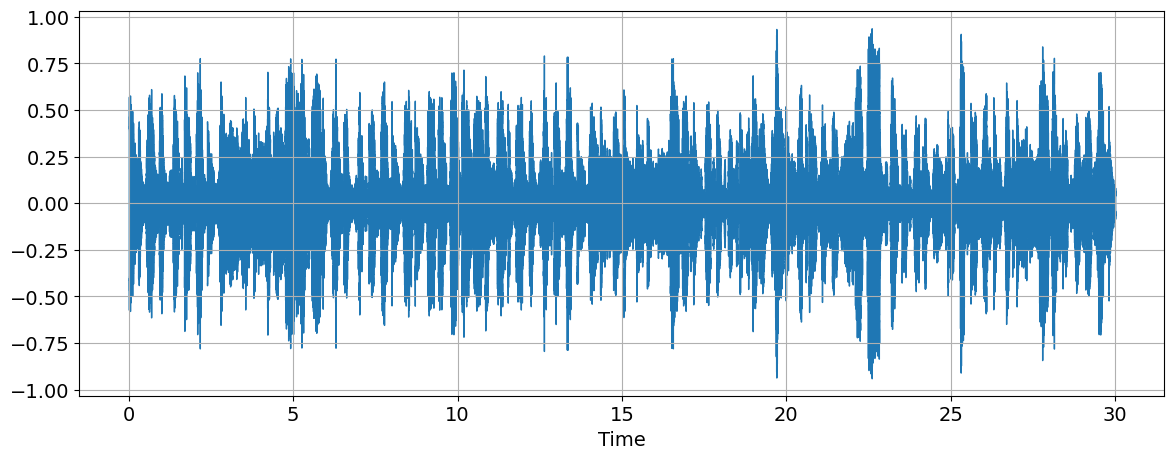

In [187]:
plt.grid()
librosa.display.waveshow(audio_array, sr=sr)



https://librosa.org/doc/0.10.1/generated/librosa.beat.beat_track.html#librosa.beat.beat_track

In [194]:
tempo, beats = librosa.beat.beat_track(y=audio_array, sr=sr, start_bpm=160) # we set the initial start_bpm=160 beats per minute because that is close to standard latin jive music speed

In [201]:
print(f"Bars per minute: {round(tempo/4,1)}")

Bars per minute: 43.1


In [196]:
beats

array([  14,   29,   44,   59,   74,   90,  104,  119,  134,  150,  165,
        181,  196,  211,  226,  241,  256,  271,  286,  301,  316,  331,
        346,  361,  376,  392,  407,  422,  438,  453,  468,  483,  498,
        513,  528,  544,  558,  573,  588,  604,  619,  635,  650,  665,
        680,  696,  711,  726,  741,  757,  771,  786,  802,  817,  832,
        847,  862,  878,  892,  908,  923,  938,  953,  969,  984,  999,
       1014, 1029, 1044, 1059, 1074, 1089, 1104, 1119, 1134, 1149, 1164,
       1180, 1194, 1210, 1225, 1240, 1255, 1271])

In [197]:
librosa.frames_to_time(beats, sr=sr)

array([ 0.32507937,  0.67337868,  1.021678  ,  1.36997732,  1.71827664,
        2.08979592,  2.41487528,  2.7631746 ,  3.11147392,  3.4829932 ,
        3.83129252,  4.20281179,  4.55111111,  4.89941043,  5.24770975,
        5.59600907,  5.94430839,  6.29260771,  6.64090703,  6.98920635,
        7.33750567,  7.68580499,  8.03410431,  8.38240363,  8.73070295,
        9.10222222,  9.45052154,  9.79882086, 10.17034014, 10.51863946,
       10.86693878, 11.2152381 , 11.56353741, 11.91183673, 12.26013605,
       12.63165533, 12.95673469, 13.30503401, 13.65333333, 14.02485261,
       14.37315193, 14.7446712 , 15.09297052, 15.44126984, 15.78956916,
       16.16108844, 16.50938776, 16.85768707, 17.20598639, 17.57750567,
       17.90258503, 18.25088435, 18.62240363, 18.97070295, 19.31900227,
       19.66730159, 20.01560091, 20.38712018, 20.71219955, 21.08371882,
       21.43201814, 21.78031746, 22.12861678, 22.50013605, 22.84843537,
       23.19673469, 23.54503401, 23.89333333, 24.24163265, 24.58

In [198]:
len(librosa.frames_to_time(beats, sr=sr))/librosa.frames_to_time(beats, sr=sr)[-1]*60/4

42.69368361526357

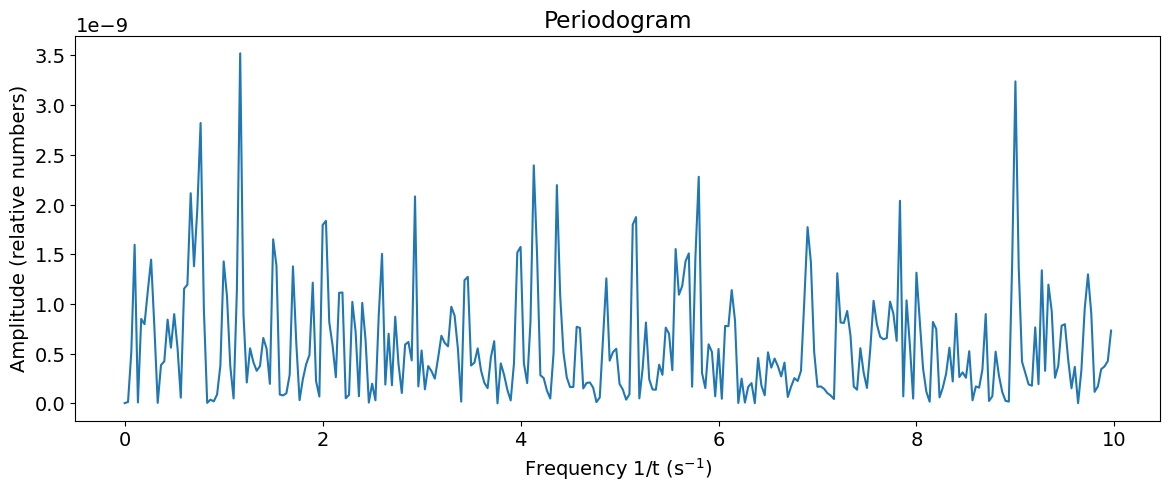

,Delta t,1/t,Bars/min
0,1.499993,0.66667,10.00005
1,1.363643,0.73333,10.99995
2,1.304342,0.76667,11.50005
3,0.857140,1.16667,17.50005
4,0.340909,2.93333,43.99995
5,0.241936,4.13333,61.99995
6,0.229007,4.36667,65.50005
7,0.172414,5.80000,87.00000
8,0.127660,7.83333,117.49995
9,0.111111,9.00000,135.00000


In [207]:
def fourier(df, sr):
    # We use for the sampling frequency 1 as we want to
    # discover cycles over the original time steps.
    f, Pxx = signal.periodogram(df, fs = sr, window='hamming', scaling='spectrum')
    last_index=np.where(f <= 10)[0][-1]
    f=f[:last_index]
    Pxx=Pxx[:last_index]
    plt.plot(f, Pxx)
    plt.title('Periodogram')
    plt.xlabel(r'Frequency 1/t (s$^{-1}$)')
    plt.ylabel(r'Amplitude (relative numbers)')
    plt.show()
    f_Pxx=np.column_stack([f,Pxx])    
    _=pd.DataFrame(f_Pxx)
    _[0]=_[0].round(5)

    results = pd.DataFrame(_.sort_values(1, ascending=False).head(10).groupby(0).mean().reset_index()[0].apply(lambda x: 1/x if x != 0 else False))
    results['1/t']= _.sort_values(1, ascending=False).head(10).groupby(0).mean().reset_index()[0]
    results['Bars/min']=results['1/t']*60/4
    results.rename(columns={0: "Delta t"}, inplace=True)
    return results


fourier(audio_array, sr)